In [1]:
import sys
import os

# Go up one directory from the notebook's location to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the project root to the Python path if it's not already there
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added '{project_root}' to the Python path")

# Now you can import from 'src' as if it were a package
from src.constrained_diffusion import constrained_diffusion_decomposition


Added '/Users/gxli/proj/GitHub/Constrained-Diffusion-Decomposition' to the Python path


In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)

    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

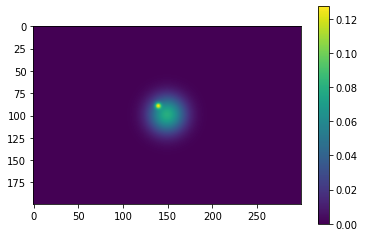

In [3]:
# Preparing sample input
N_x = 300
N_y = 200
X = np.linspace(0, 300, N_x)
Y = np.linspace(0, 200, N_y)
X, Y = np.meshgrid(X, Y)

mu = np.array([150., 100.])
Sigma = np.array([[200, 0], [0,  200]])

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y


Z1 = multivariate_gaussian(pos, mu, Sigma) * 100
Z3 = multivariate_gaussian(pos, mu - 10 , Sigma * 0.03) * 3

Z = Z1 + Z3

plt.figure()
plt.imshow(Z)
plt.colorbar()
plt.show()

In [6]:
# performing decomposition
result, residual, scales = constrained_diffusion_decomposition(Z,up_sample=False, return_scales=True)

Automatically determined max_scale = 150.00 (from data shape (200, 300))
Automatically determining num_channels.
--> Determined num_channels = 7

--- Performing standard fixed-grid decomposition for all scales ---
Decomposing across 7 user-specified scales: [  1.     2.31   5.31  12.25  28.23  65.07 150.  ]
Running in CONSTRAINED (standard) mode.
Channel 0: Scale < 1.00 pixels, Iterations: 33
Channel 1: Scale < 2.31 pixels, Iterations: 144
Channel 2: Scale < 5.31 pixels, Iterations: 144
Channel 3: Scale < 12.25 pixels, Iterations: 144
Channel 4: Scale < 28.23 pixels, Iterations: 144
Channel 5: Scale < 65.07 pixels, Iterations: 144
Channel 6: Scale < 150.00 pixels, Iterations: 144


/var/folders/t_/1c6q66gn5jqg62hwxfkjlb380000gn/T/ipykernel_53251/333816702.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


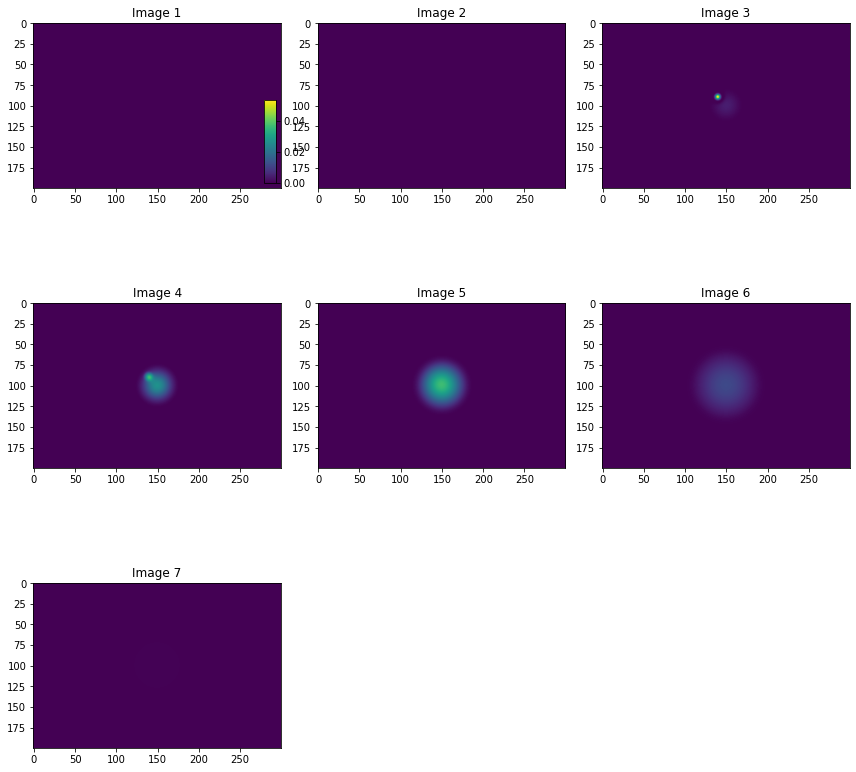

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Assuming 'result' is a list of 2D arrays
# Example: result = [np.random.rand(10, 10) for _ in range(6)]  # Dummy data for testing
n_images = len(result)
cols = 3  # Fixed number of columns
rows = int(np.ceil(n_images / cols))  # Calculate required rows

# Determine the global min and max for the shared color scale
vmin = min(np.min(img) for img in result)
vmax = max(np.max(img) for img in result)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows), squeeze=False)
axes = axes.flatten()  # Flatten for easier iteration

# Plot each image in the grid
for idx, img in enumerate(result):
    ax = axes[idx]
    im = ax.imshow(img, cmap='viridis', vmin=vmin, vmax=vmax)  # Use shared color scale
    ax.set_title(f'Image {idx + 1}')  # Add title for clarity
    ax.axis('on')  # Show axes (can be turned off with ax.axis('off') if desired)

    # Add colorbar only to the first subplot (top-left)
    if idx == 0:
        # Create an inset axes for the colorbar inside the first subplot
        cax = inset_axes(ax, width="5%", height="50%", loc='lower right',
                         bbox_to_anchor=(0, 0, 1, 1), bbox_transform=ax.transAxes)
        fig.colorbar(im, cax=cax)  # Add colorbar to inset axes

# Hide empty subplots if any
for idx in range(len(result), len(axes)):
    axes[idx].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [25]:
constrained_diffusion_decomposition?